# Homework 2: Problems (due 5 October 2022 before class)
### PHYS 440/540, Fall 2022
https://github.com/gtrichards/PHYS_440_540/


## Problem 1 (hint: watch the 2020 lecture recording!)

This question is about IQ. It is questionionable whether this is a meaningful metric, but it is useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. 

3) Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

4) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

5) What IQ corresponds to "one in a million"?


## Problem 2
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 draws of a (very) non-Gaussian distribution (for example chi-square with low $k$).  Demonstrate that the result confirms the central limit theorem by showing that the mean of the draws becomes Gaussian with large `N`.

Note that you'll need functions to both generate the true distribution and also to take random draws from it.

See below for code starter.


## Problem 3

On Data Camp:

Do Chapters 1 and 2 of "Exploratory Data Analysis in Python" to get some practice with CDF.  

Chapter 2 is actually the only one that I care about, but it makes sense to do chapter 1 to give you some context.  Chapter 1 introduces some Pandas tools.  I'm not planning on assigning the "Data Manipulation with Pandas" course, but you might find that useful as well.  

Note this lesson talks about PMFs.  A PMF is a PDF for a discrete distribution.  For the sake of comparing this assignment to class you can think of PMFs and PDFs as the same thing.

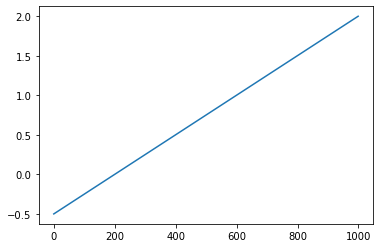

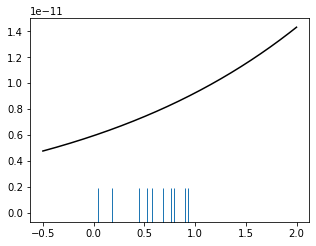

In [4]:
#Problem 1, Part 1 starter code
from scipy import stats
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

mu = 100
sigma = 15

distG = stats.norm(loc=mu,scale=sigma) # Normal distribution with mean, stdev

xgrid = np.linspace(-0.5,2,1000) # generate distribution for a uniform grid of x values
gaussPDF = plt.plot(xgrid)  # y values for each x

xrvs = np.random.random(10) # 10 random draws


# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, distG.pdf(xgrid), ls='-', c='black')
plt.plot(xrvs, 0*xrvs, '|', markersize=50)  #Plotting the 10 random draws

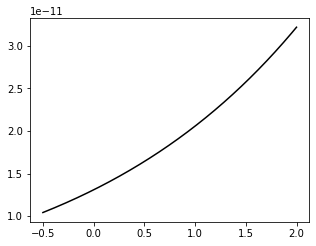

In [2]:
#Problem 1, Part 2 starter code

#The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='black')

(array([2048.41708178,  133.85397965,   84.22272877,   62.41505793,
          50.38323953,   42.86335303,   37.59943248,   33.08750059,
          29.32755734,   27.82358004,   24.81562544,   24.06363679,
          21.80767084,   21.05568219,   19.55170489,   18.79971624,
          18.04772759,   17.29573894,   16.54375029,   16.54375029,
          15.03977299,   15.03977299,   14.28778434,   14.28778434,
          13.53579569,   13.53579569,   12.78380704,   12.78380704,
          12.78380704,   12.0318184 ,   12.0318184 ,   12.0318184 ,
          11.27982975,   11.27982975,   11.27982975,   11.27982975,
          10.5278411 ,   11.27982975,   10.5278411 ,   10.5278411 ,
          10.5278411 ,    9.77585245,   10.5278411 ,    9.77585245,
           9.77585245,    9.77585245,    9.77585245,    9.77585245,
           9.77585245,    9.77585245,    9.77585245,    9.0238638 ,
           9.77585245,    9.0238638 ,    9.77585245,    9.0238638 ,
           9.77585245,    9.0238638 ,    9.77585

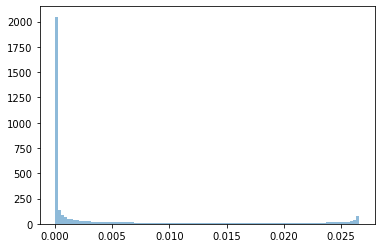

In [8]:
#Problem 1, Part 3 starter code

#Sample the full distribution, but from the opposite direction as Part 1
ppfvals = np.linspace(0,200,10000) #10000 probabilities to sample
results = distG.pdf(ppfvals) #Value of the normal distribution at those probabilities

plt.hist(results,bins=100,histtype='stepfilled', alpha=0.5, density=True)


In [9]:
#Problem 1, Part 4 starter code

sf145 = distG.sf(145)
print(sf145)

0.0013498980316300933


In [10]:
#Problem 1, Part 5 starter code

OneInAMillionVal = distG.isf(1e-6)
print('IQ=', OneInAMillionVal)

IQ= 171.30136463234348


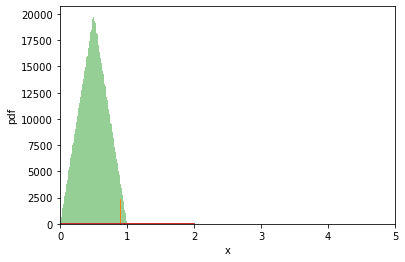

In [14]:
#Problem 2 starter coded
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import stats

N=2 # Number of draws.  Show both small and large values
mu=0.5
sigma_h=1.0/np.sqrt(12)/np.sqrt(N)

xgrid = np.linspace(-1,2,1000) # Array to sample the space

dist = stats.norm(mu,sigma_h) # Complete
plt.plot(xgrid,dist.pdf(xgrid)) # Complete

#Rug plot of N random draws
x = np.random.random(N) # N random draws
plt.plot(x, 0*x, '|', markersize=50) #Rug plot of random draws
plt.xlabel('x')
plt.ylabel('pdf')
plt.xlim(0,5) #Limit the x-axis range to make things easier to see

# Repeat that 1,000,000 times, averaging the N draws each time
# You could do this any number o ways (including with just 1 line)
yy = []
for i in np.arange(1000000): # Complete
    xx = np.random.random(N) # N random draws
    yy.append(xx.mean()) # Append average of those random draws to the end of the array

#Plot the histogram with Scott or Freedman bins    
_ = plt.hist(yy,bins=100,histtype="stepfilled",alpha=0.5)

#Overplot a Gaussian at the appropriate location
distG = stats.norm(loc=mu,scale=np.sqrt(2*np.pi/N)) # Complete
plt.plot(xgrid,dist.pdf(xgrid)) # Complete

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.